In [1]:
from IPython.display import Image

# 결정트리 or 의사결정나무 (Decision Tree)

결정트리를 가장 단수하게 표현하자면, **Tree 구조를 가진 알고리즘**입니다.

의사결정나무는 데이터를 분석하여 데이터 사이에서 패턴을 예측 가능한 규칙들의 조합으로 나타내며, 이 과정을 시각화 해 본다면 마치 **스무고개** 놀이와 비슷합니다.

의사 결정트리는 의사를 어떻게 결정할지에 따라 다른 결과를 도출하는 방식으로 전개된다.  
트리란 내가 의사를 결정하는데 있어서 선택지가 2가지만 있는 것이 아니라 여러 개의 선택지 가능하고 나무를 뒤집어 놓은 것처럼, 가지에 가지를 뻗은 행태로 의사를 결정해 나가는 구조라서 트리라는 이름이 붙여졌다.  

이렇게 가지를 뻗어나가는 형태로 최종 의사를 결정할 수 있다. 

불순도가 가장 낮아지는 방향(순도가 높아지는 방향)으로 의사를 결정  
불순도 측정 - **엔트로피, 지니계수**

In [2]:
Image(url='https://blog.kakaocdn.net/dn/wlH1u/btqwWZI9Xen/kFJDjGSFJAPxhyatC3Xhs0/img.png', width=500)

In [4]:
Image(url='https://tensorflowkorea.files.wordpress.com/2017/06/2-23.png',width=360)

In [5]:
Image(url='https://tensorflowkorea.files.wordpress.com/2017/06/2-24.png?w=1024',width=360)

In [7]:
Image(url='https://tensorflowkorea.files.wordpress.com/2017/06/2-25.png?w=1024',width=360)

In [9]:
Image(url='https://tensorflowkorea.files.wordpress.com/2017/06/2-26.png?w=1024',width=360)

결정트리의 기본 아이디어는 sample이 가장 섞이지 않은 상태로 완전히 분류되는 것, 다시 말해서 **엔트로피(Entropy)를 낮추도록** 만드는 것입니다.  
순도를 올리고 불순도를 낮추는 방향으로 의사 결정 진행, 계속해서 진행할 경우 overfitting 발생  
이를 해결하기 위해 Hyper Parameter옵션 기재

## 엔트로피 (Entropy)

엔트로피는 쉽게 말해서 **무질서한 정도를 정량화(수치화)한 값**입니다.

다음은 **엔트로피 지수를 불순도에 따른 지표로 표현**되었습니다.

In [11]:
Image(url='https://miro.medium.com/max/875/1*i7cfMirN2WpaJhYZa1a1Mg.png', width=500)

결정트리에서 질문을 만들어내는 기준은 불순도를 최소화하는 방향으로 결정되어진다  
불순도란 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 말하는데  
트리의 아랫 부분으로 내려 갈수록 불순도가 낮아진다.  
곧 순도가 높아지는 방향이다.  

한범주에 서로 다른 데이터가 1일 때 불순도가 가장 낮고  
한 범주 안에 서로 다른 데이터가 정확히 반반 있다면 불순도가 가장 높다

엔트로피는 무질서함(불순도)을 나타내는 지표이고  
엔트로피 계수를 그대로 변환해서 사용하는 것이 지니계수이다.  
결정트리에서 사용되는 지니 계수는  0~0.5사이의 값을 가진다


### 엔트로피 수식의 이해

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 샘플데이터를 생성합니다.
group_1 = np.array([0.3, 0.4, 0.3])
group_2 = np.array([0.7, 0.2, 0.1])
group_3 = np.array([0.01, 0.01, 0.98])

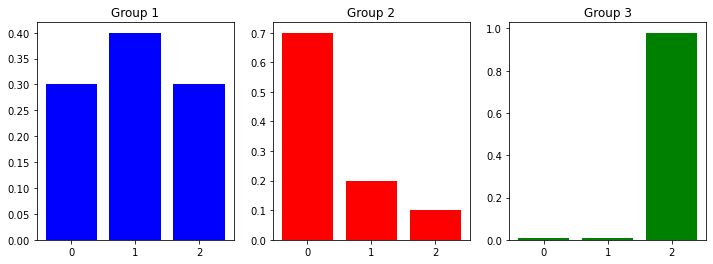

In [4]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(np.arange(3), group_1, color='blue')
axes[0].set_title('Group 1')
axes[1].bar(np.arange(3), group_2, color='red')
axes[1].set_title('Group 2')
axes[2].bar(np.arange(3), group_3, color='green')
axes[2].set_title('Group 3')
plt.show()

In [15]:
Image(url='https://miro.medium.com/max/1122/0*DkWdyGidNSfdT1Nu.png', width=350)

In [5]:
# entropy를  python으로 구현합니다.

def entropy(x):
    return -(x * np.log2(x)).sum() 

### Entropy 계산 및 시각화


In [6]:
entropy_1 = entropy(group_1)
entropy_2 = entropy(group_2)
entropy_3 = entropy(group_3)
print(f'Group 1: {entropy_1:.3f}\nGroup 2: {entropy_2:.3f}\nGroup 3: {entropy_3:.3f}')

Group 1: 1.571
Group 2: 1.157
Group 3: 0.161


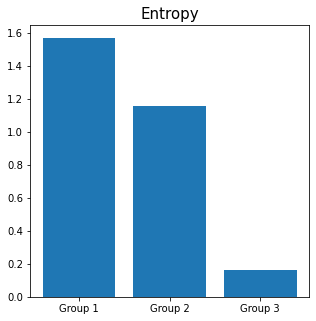

In [7]:
plt.figure(figsize=(5, 5))
plt.bar(['Group 1', 'Group 2', 'Group 3'], [entropy_1, entropy_2, entropy_3])
plt.title('Entropy', fontsize=15)
plt.show()

## 지니 계수 (Gini Index)

- 클래쓰들이 공평하게 섞여 있을 수록 **지니 계수**는 올라갑니다.
- Decision Tree는 지니 불순도를 낮추는 방향으로 가지치기를 진행합니다.
- 반드시 0 ~ 0.5 사이의 값을 가진다.

In [8]:
# Gini Index 구현합니다.
def gini(x):
    return 1 - ((x / x.sum())**2).sum()

In [9]:
# 샘플데이터를 생성합니다.
group_1 = np.array([50, 50])
group_2 = np.array([30, 70])
group_3 = np.array([0, 100]) 

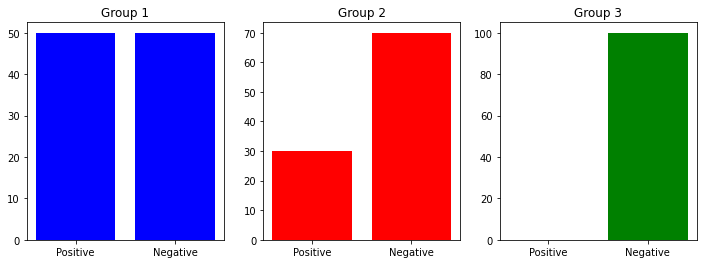

In [10]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(12, 4)
axes[0].bar(['Positive', 'Negative'], group_1, color='blue')
axes[0].set_title('Group 1')
axes[1].bar(['Positive', 'Negative'], group_2, color='red')
axes[1].set_title('Group 2')
axes[2].bar(['Positive', 'Negative'], group_3, color='green')
axes[2].set_title('Group 3')
plt.show()

In [11]:
gini_1 = gini(group_1)
gini_2 = gini(group_2)
gini_3 = gini(group_3)

print(f'Group 1: {gini_1:.3f}\nGroup 2: {gini_2:.3f}\nGroup 3: {gini_3:.3f}')

Group 1: 0.500
Group 2: 0.420
Group 3: 0.000


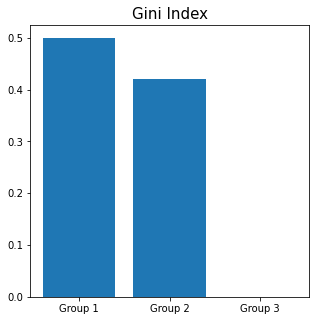

In [12]:
plt.figure(figsize=(5, 5))
plt.bar(['Group 1', 'Group 2', 'Group 3'], [gini_1, gini_2, gini_3])
plt.title('Gini Index', fontsize=15)
plt.show()

## Decision Tree 구현

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 42

In [15]:
# breast cancer 데이타셋 로드
cancer = load_breast_cancer()

In [17]:
# train_test_split 데이타 분할
x_train, x_test, y_train, y_test = train_test_split(cancer['data'],cancer['target'], random_state=SEED, stratify=cancer['target'])

In [18]:
# 알고리즘 정의
tree = DecisionTreeClassifier(random_state=0)

In [19]:
# 학습
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [20]:
# 예측
pred = tree.predict(x_test)

In [21]:
# 정확도 측정
accuracy = accuracy_score(pred, y_test)
print(f'Accuracy Score: {accuracy:.3f}')

Accuracy Score: 0.937


### 의사결정나무의 시각화

In [23]:
import graphviz
from sklearn.tree import export_graphviz

def show_trees(tree):
    export_graphviz(tree, out_file='cancer_tree.dot',
                    class_names=cancer.target_names,
                    feature_names=cancer.feature_names,
                    #impurity=False, # gini 미출력
                    filled=True) 

    with open('cancer_tree.dot', encoding='utf-8') as f:
        dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [24]:
show_trees(tree)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### 장점
쉽고 직관적입니다.  
각 피처의 스케일링과 정규화 같은 전처리 작업의 영향도가 크지 않습니다.  

### 단점
규칙을 추가하며 서브트리를 만들어 나갈수록 모델이 복잡해지고, 과적합에 빠지기 쉽습니다.  
→ 트리의 크기를 사전에 제한하는 **하이퍼파라미터 튜닝**이 필요합니다.

## 주요 Hyper Parameter

`max_depth`는 최대 트리의 깊이를 제한 합니다.

기본 값은 None, 제한 없음 입니다.

In [25]:
tree = DecisionTreeClassifier(max_depth=3, random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### min_sample_split

`min_sample_split`은 노드 내에서 분할이 필요한 최소의 샘플 숫자입니다.

기본 값은 2입니다.

In [26]:
tree = DecisionTreeClassifier(max_depth=6, min_samples_split=20, random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### min_samples_leaf

`min_samples_leaf`는 말단 노드의 최소 샘플의 숫자를 지정합니다.

기본 값은 1 입니다.

In [ ]:
tree = DecisionTreeClassifier(min_samples_leaf=10, random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)

### max_leaf_nodes

`max_leaf_nodes`는 말단 노드의 최대 갯수 (과대 적합 방지용)

기본 값은 None, 제한 없음 입니다.

In [ ]:
tree = DecisionTreeClassifier(max_leaf_nodes=10, max_depth=6, random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)

### max_features

최적의 분할을 찾기 위해 고려할 피처의 수

0.8 은 80% 의 feature 만 고려하여 분할 알고리즘 적용

기본 값은 None, 모두 사용입니다.

In [ ]:
tree = DecisionTreeClassifier(max_depth=7, max_features=0.8, random_state=SEED)
tree.fit(x_train, y_train)
show_trees(tree)

## feature의 중요도

`feature_importances_` 변수를 통해서 tree 알고리즘이 학습시 고려한 feature 별 중요도를 확인할 수 있습니다.

 결정트리 모델을 생성하고 수행하게되면
 결과적으로 속성의 중요도를 알수 있는 특성중요도 인스턴스가 생성된다.
     
 결정트리를 만드는데 있어서   
**어떤 의사결정, 조건, 질문, 특징, 속성**으로 결정되는가...다 같은 말이다.

 특성 중요도는   
 Tree모델을 생성해서 학습시키고 난후, **내부적으로 생성되는 인스턴스**이다.  
 
 트리구조상 상위에 있는 특성, 속성이 중요한 것으로 지정되며   
 트리계층을 내려갈수록 중요도가 떨어지는데, 그렇다고 이것이 필요없는 속성으로 바로 간주하는 것은  
 위험한 발상이다.  
 
 특성 중요도는 **트리의 계층구조와 밀접한 연관**을 가진다.

In [27]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04957353, 0.        , 0.01291925, 0.00255571,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.74447841, 0.03459081, 0.        , 0.        , 0.        ,
       0.        , 0.01862966, 0.12507853, 0.0121741 , 0.        ])

0의 값을 가진 feature는 의사결정에 사용하지 않은 feature  
DataFrame으로 만들면 **중요도(feature importances) 순서로 정렬**할 수 있습니다.

In [30]:
import pandas as pd
df = pd.DataFrame(list(zip(cancer['feature_names'], tree.feature_importances_)), columns=['features', 'importance'])
df = df.reset_index(drop=False).sort_values(by='importance', ascending=False)
df

,index,features,importance
20,20,worst radius,0.744478
27,27,worst concave points,0.125079
11,11,texture error,0.049574
21,21,worst texture,0.034591
26,26,worst concavity,0.018630
13,13,area error,0.012919
28,28,worst symmetry,0.012174
14,14,smoothness error,0.002556
0,0,mean radius,0.000000
17,17,concave points error,0.000000


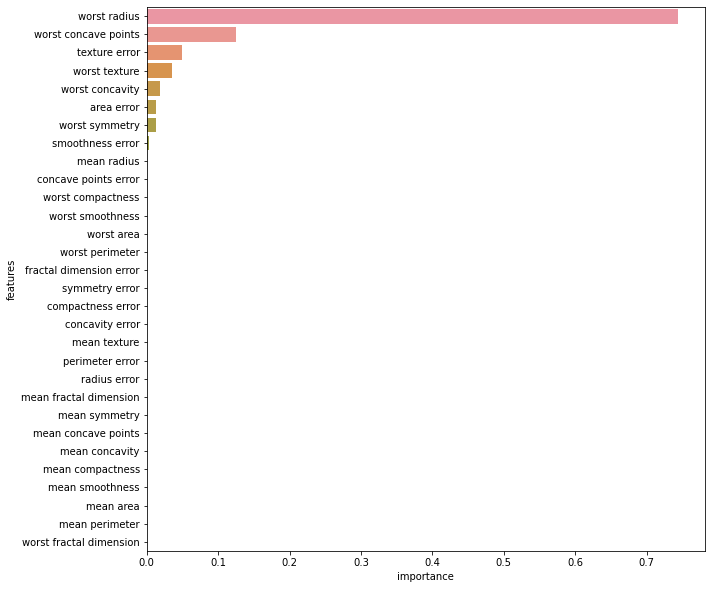

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.barplot(y='features', x='importance', data=df)
plt.show()